In [10]:
import os
os.environ['SPARK_HOME'] = '/mnt/c/spark'
print(os.environ.get('SPARK_HOME'))

/mnt/c/spark


In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType, DoubleType
from pyspark.sql.functions import col
import seaborn as sns

spark = SparkSession.builder.appName('EDA').getOrCreate()
df = spark.read.csv("preprocessed_datasets/clean_data.csv", sep = ',', header=True)

df = df.withColumn("model_year", col("model_year").cast(IntegerType())) \
               .withColumn("milage", col("milage").cast(DoubleType())) \
               .withColumn("engine_capacity", col("engine_capacity").cast(DoubleType())) \
               .withColumn("engine_horsepower", col("engine_horsepower").cast(DoubleType())) \
                .withColumn("price", col("price").cast(IntegerType()))
df.show()

+-------------+----------+--------+-------------+------------+-------+-------+--------------------+-----+---------------+-----------------+
|        brand|model_year|  milage|    fuel_type|transmission|ext_col|int_col|            accident|price|engine_capacity|engine_horsepower|
+-------------+----------+--------+-------------+------------+-------+-------+--------------------+-----+---------------+-----------------+
|      Lincoln|      2002|143250.0|     Gasoline|   Automatic| Silver|  Beige|At least 1 accide...| 4999|            3.9|            252.0|
|    Chevrolet|      2002|136731.0|E85 Flex Fuel|   Automatic|   Blue|   Gray|       None reported|13900|            5.3|            320.0|
|      Genesis|      2017| 19500.0|     Gasoline|       Other|  Black|  Black|       None reported|45000|            5.0|            420.0|
|         Audi|      2018| 40950.0|     Gasoline|   Automatic|  White|      –|       None reported|29950|            2.0|            252.0|
|         Audi|     

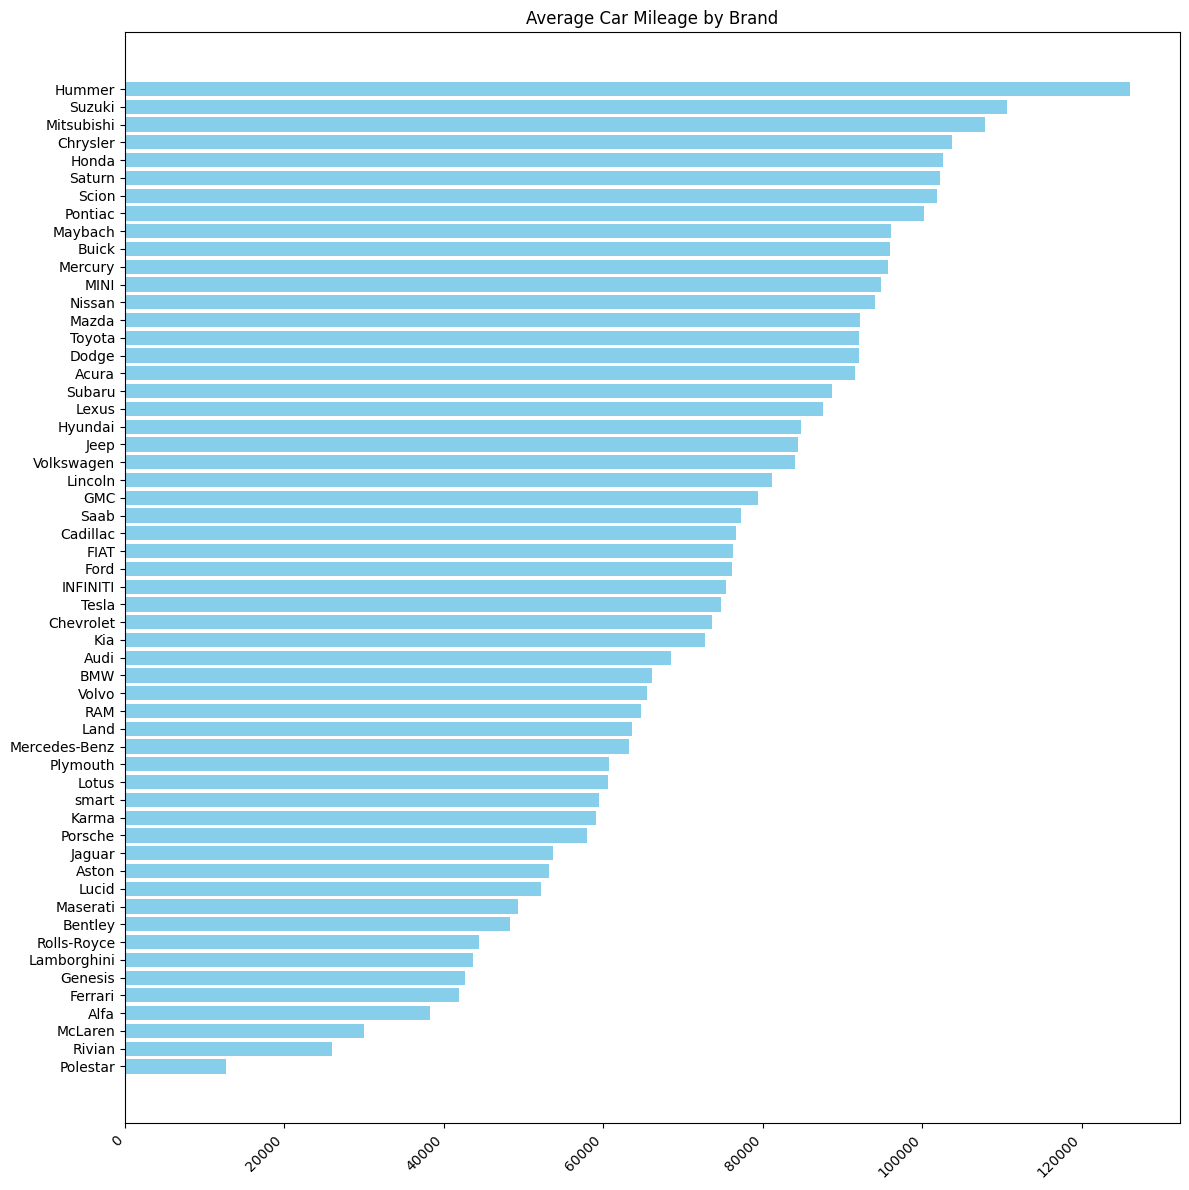

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
# Convert the PySpark DataFrame to Pandas for easier plotting with Matplotlib
df_pandas = df.select("brand", "milage").toPandas()
df_pandas['milage'] = pd.to_numeric(df_pandas['milage'], errors='coerce')

# Aggregate the data by brand and calculate the average mileage
df_pandas_grouped = df_pandas.groupby('brand')['milage'].mean().reset_index()

# Sort by mileage for better visualization
df_pandas_grouped = df_pandas_grouped.sort_values(by='milage', ascending=True)

plt.figure(figsize=(12, 12))
plt.barh(df_pandas_grouped['brand'], df_pandas_grouped['milage'], color='skyblue')

# Add labels and title
plt.title('Average Car Mileage by Brand')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.savefig("charts/avg_mileage_by_car_brand.png", bbox_inches="tight")
plt.show()

In [13]:
# Group by 'brand' and calculate the average price
df_pandas = df.select("brand", "price").toPandas()
df_pandas['price'] = pd.to_numeric(df_pandas['price'], errors='coerce')
df_pandas_grouped_price = df_pandas.groupby('brand')['price'].mean().reset_index()

# Sort the data by average price for better visualization
df_pandas_grouped_price = df_pandas_grouped_price.sort_values(by='price', ascending=False)

print(df_pandas_grouped_price)

            brand         price
45    Rolls-Royce  54582.719577
34        McLaren  52543.487500
44         Rivian  43749.666667
5         Bentley  43253.609504
12        Ferrari  43023.807018
24    Lamborghini  40357.040230
1            Alfa  39757.717808
2           Aston  39619.075630
15        Genesis  38979.704286
31       Maserati  38129.802215
42        Porsche  37148.592129
20         Jaguar  36515.977468
22          Karma  36247.500000
43            RAM  35956.087825
25           Land  35292.474646
32        Maybach  35249.500000
35  Mercedes-Benz  34285.954303
4             BMW  32034.992805
40       Polestar  31990.000000
14            GMC  31958.338192
7        Cadillac  31591.498909
8       Chevrolet  31372.777884
13           Ford  31019.104275
3            Audi  29239.750723
54          Volvo  28857.559649
51          Tesla  28784.800000
19       INFINITI  27754.997954
46           Saab  26589.450000
27        Lincoln  26094.459832
26          Lexus  25942.423962
23      

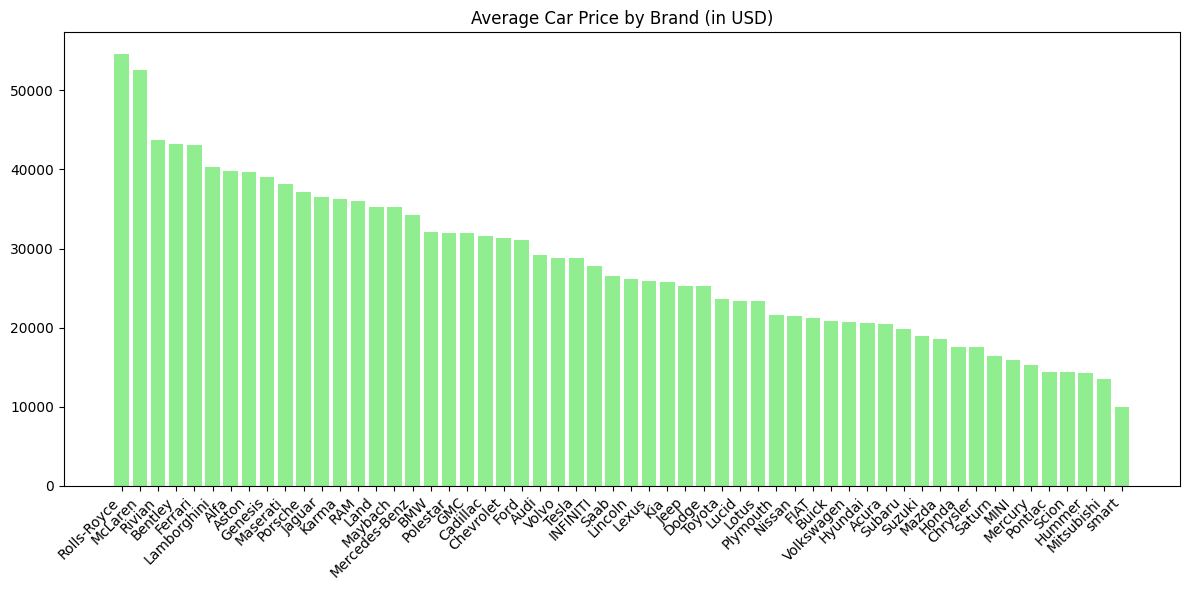

In [14]:
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_pandas_grouped_price['brand'], df_pandas_grouped_price['price'], color='lightgreen')

# Add labels and title
plt.title('Average Car Price by Brand (in USD)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.savefig("charts/avg_car_price_by_brand.png", bbox_inches="tight")
plt.show()


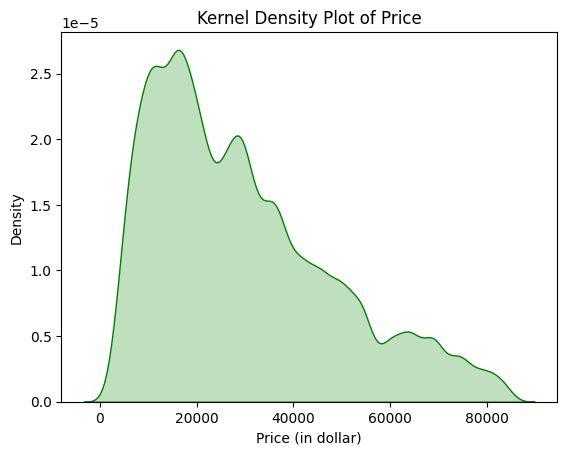

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Convert the 'price' column from PySpark DataFrame to Pandas
df_pandas = df.select("price").toPandas()

sns.kdeplot(df_pandas['price'], fill=True, color='green')
plt.xlabel('Price (in dollar)')
plt.title('Kernel Density Plot of Price')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.savefig("charts/density_price.png", bbox_inches="tight")
plt.show()

In [16]:
df = spark.read.csv("preprocessed_datasets/factorized_data.csv", sep = ',', header=True)

df = df.withColumn("model_year", col("model_year").cast(IntegerType())) \
               .withColumn("milage", col("milage").cast(DoubleType())) \
               .withColumn("engine_capacity", col("engine_capacity").cast(DoubleType())) \
               .withColumn("engine_horsepower", col("engine_horsepower").cast(DoubleType())) \
               .withColumn("brand_numeric", col("brand_numeric").cast(IntegerType())) \
               .withColumn("transmission_numeric", col("transmission_numeric").cast(IntegerType())) \
               .withColumn("fuel_type_numeric", col("fuel_type_numeric").cast(IntegerType())) \
               .withColumn("ext_col_numeric", col("ext_col_numeric").cast(IntegerType())) \
               .withColumn("int_col_numeric", col("int_col_numeric").cast(IntegerType())) \
               .withColumn("accident_numeric", col("accident_numeric").cast(IntegerType())) \
                .withColumn("price", col("price").cast(IntegerType()))

print(df.columns)


['model_year', 'milage', 'price', 'engine_capacity', 'engine_horsepower', 'brand_numeric', 'transmission_numeric', 'fuel_type_numeric', 'ext_col_numeric', 'int_col_numeric', 'accident_numeric']


In [17]:
# Select numerical columns for correlation
numerical_columns = ['model_year', 'milage', 'engine_capacity', 'engine_horsepower', 
                   'brand_numeric', 'transmission_numeric', 
                   'fuel_type_numeric', 'ext_col_numeric',
                   "int_col_numeric", "accident_numeric", "price"]

df = df.select(numerical_columns).toPandas()

# Calculate the correlation matrix
correlation_matrix = df.corr()

print(correlation_matrix)


                      model_year    milage  engine_capacity  \
model_year              1.000000 -0.622071        -0.000822   
milage                 -0.622071  1.000000        -0.041075   
engine_capacity        -0.000822 -0.041075         1.000000   
engine_horsepower       0.363526 -0.402096         0.625622   
brand_numeric          -0.113020  0.077671        -0.110832   
transmission_numeric   -0.139533 -0.012997        -0.104204   
fuel_type_numeric       0.104377 -0.024378         0.126749   
ext_col_numeric        -0.124377  0.041267        -0.002814   
int_col_numeric        -0.030685  0.005960        -0.007514   
accident_numeric       -0.196667  0.278470        -0.036280   
price                   0.629598 -0.674089         0.190429   

                      engine_horsepower  brand_numeric  transmission_numeric  \
model_year                     0.363526      -0.113020             -0.139533   
milage                        -0.402096       0.077671             -0.012997   
eng

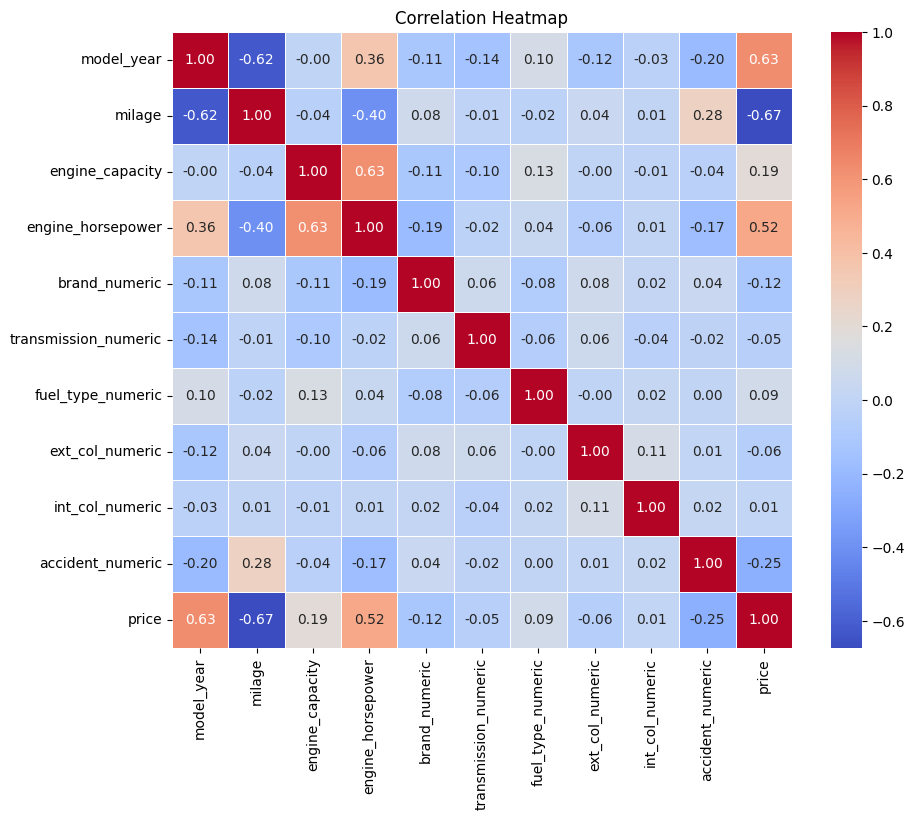

In [18]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')
plt.savefig("charts/correlation_heatmap.png", bbox_inches="tight")
plt.show()
